# 1. Getting VizDoom Up and Running

In [8]:
!pip install vizdoom

In [9]:
# !cd github & git clone https://github.com/mwydmuch/VizDoom

Cloning into 'VizDoom'...
remote: Enumerating objects: 18326, done.
remote: Counting objects: 100% (2926/2926), done.
remote: Compressing objects: 100% (965/965), done.
remote: Total 18326 (delta 1767), reused 2736 (delta 1659), pack-reused 15400
Receiving objects: 100% (18326/18326), 59.28 MiB | 12.90 MiB/s, done.
Resolving deltas: 100% (11560/11560), done.


In [10]:
from vizdoom import *
import random
import time 

In [11]:
game = DoomGame()
game.load_config('github/VizDoom/scenarios/basic.cfg')
game.init()

# Do not close the windows now

In [12]:
import numpy as np
# 3 possible actions: left, right, attack
actions =  np.identity(3, dtype=np.uint8) 
# game.make_action(random.choice(actions))
state = game.get_state()

In [13]:
episodes = 1

for episode in range(episodes):
    game.new_episode()
    while not game. is_episode_finished():
        state = game.get_state()
        img = state.screen_buffer
        info = state.game_variables # ammo  
        reward = game.make_action(random.choice(actions))
        print('Reward: ', reward)
        print(info)
        time.sleep(0.02)
    print('result: ', game.get_total_reward())
    time.sleep(2)


Reward:  -1.0
[50.]
Reward:  -1.0
[50.]
Reward:  -1.0
[50.]
Reward:  -1.0
[50.]
Reward:  -6.0
[50.]
Reward:  -1.0
[49.]
Reward:  -1.0
[49.]
Reward:  -1.0
[49.]
Reward:  -1.0
[49.]
Reward:  -1.0
[49.]
Reward:  -1.0
[49.]
Reward:  -1.0
[49.]
Reward:  -1.0
[49.]
Reward:  -1.0
[49.]
Reward:  -1.0
[49.]
Reward:  -1.0
[49.]
Reward:  -1.0
[49.]
Reward:  -1.0
[49.]
Reward:  -1.0
[49.]
Reward:  -1.0
[49.]
Reward:  -1.0
[49.]
Reward:  -1.0
[49.]
Reward:  -1.0
[49.]
Reward:  -1.0
[49.]
Reward:  -1.0
[49.]
Reward:  -1.0
[49.]
Reward:  -1.0
[49.]
Reward:  -1.0
[49.]
Reward:  -6.0
[49.]
Reward:  -1.0
[48.]
Reward:  -1.0
[48.]
Reward:  -1.0
[48.]
Reward:  -1.0
[48.]
Reward:  -1.0
[48.]
Reward:  -1.0
[48.]
Reward:  -1.0
[48.]
Reward:  -1.0
[48.]
Reward:  -1.0
[48.]
Reward:  -1.0
[48.]
Reward:  -1.0
[48.]
Reward:  -1.0
[48.]
Reward:  -1.0
[48.]
Reward:  -1.0
[48.]
Reward:  -1.0
[48.]
Reward:  -1.0
[48.]
Reward:  -1.0
[48.]
Reward:  -1.0
[48.]
Reward:  -6.0
[48.]
Reward:  -1.0
[47.]
Reward:  -1.0
[47.]


In [14]:
game.close()

# 2. Converting it to a Gym Env

In [15]:
from gymnasium import Env
from gymnasium.spaces import Discrete, Box
import cv2 # for making image grey scale and thus increase training speed

In [16]:
Box(low=0, high=10,shape=(5,5), dtype=np.uint8).sample()

array([[ 4, 10, 10,  7,  7],
       [ 6,  8,  0,  1,  9],
       [ 0,  5,  3, 10,  6],
       [ 8,  6,  0,  2,  9],
       [10,  9,  6,  5,  9]], dtype=uint8)

In [114]:
class VizDoomGym(Env):
    def __init__(self, render=False):
        super().__init__()
        self.game = DoomGame()
        self.game.load_config('github/VizDoom/scenarios/basic.cfg')
        self.game.set_window_visible(render)
        self.game.init()
        
        # get shape: game.get_state().screen_buffer.shape
        self.observation_space = \
            Box(low=0, high=255, shape=(100, 160, 1), dtype=np.uint8)
            # Box(low=0, high=255, shape=(3, 240, 320), dtype=np.uint8) 
        self.action_space = Discrete(3)
    

    def step(self, action : int):
        actions = np.identity(3, dtype=np.uint8)
        # 4 is a frame-skip parameter
        reward = self.game.make_action(actions[action], 4)
        state  = self.game.get_state()
        
        if state:
            img  = state.screen_buffer # actually the next frame
            img  = self.grayscale(img)
            info = state.game_variables
        else:
            img  = np.zeros(self.observation_space.shape)
            info = 0
        done = self.game.is_episode_finished()

        return img, reward, done, info


    def close(self):
        self.game.close()
        
        
    def render():
        pass


    def grayscale(self, observation):
        # moveaxis: tensor of shape (3, 240, 320) --> (240, 320, 3)
        gray = cv2.cvtColor(np.moveaxis(observation, 0, -1), 
                            cv2.COLOR_BGR2GRAY)
        # reduce resolution
        resize = cv2.resize(gray, (160, 100), interpolation=cv2.INTER_CUBIC)
        img = np.reshape(resize, (100, 160, 1))
        return img

    def reset(self):
        self.game.new_episode()
        img = self.game.get_state().screen_buffer
        return self.grayscale(img)

In [115]:
env = VizDoomGym(render=True)

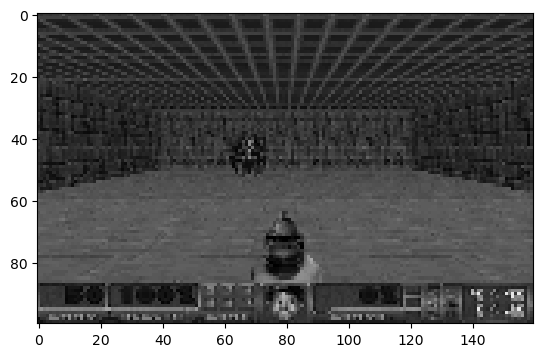

In [116]:
state = env.reset()

# state.shape
# from matplotlib import pyplot as plt
# plt.imshow(cv2.cvtColor(state, cv2.COLOR_BGR2RGB))

In [102]:
env.reset()

array([[[35, 39, 39, ..., 39, 39, 39],
        [59, 67, 59, ..., 67, 67, 91],
        [79, 79, 79, ..., 79, 91, 91],
        ...,
        [19, 19, 11, ..., 47, 47, 55],
        [19, 27, 19, ..., 47, 47, 47],
        [11, 19, 19, ..., 27, 19, 19]],

       [[35, 39, 39, ..., 39, 39, 39],
        [59, 67, 59, ..., 67, 67, 91],
        [79, 79, 79, ..., 79, 91, 91],
        ...,
        [19, 19, 11, ..., 47, 47, 55],
        [19, 27, 19, ..., 47, 47, 47],
        [11, 19, 19, ..., 27, 19, 19]],

       [[35, 39, 39, ..., 39, 39, 39],
        [59, 67, 59, ..., 67, 67, 91],
        [79, 79, 79, ..., 79, 91, 91],
        ...,
        [19, 19, 11, ..., 47, 47, 55],
        [19, 27, 19, ..., 47, 47, 47],
        [11, 19, 19, ..., 27, 19, 19]]], dtype=uint8)

In [117]:
env.close()

In [111]:
state

array([[35, 39, 39, ..., 39, 39, 39],
       [59, 67, 59, ..., 67, 67, 91],
       [79, 79, 79, ..., 79, 91, 91],
       ...,
       [19, 19, 11, ..., 47, 47, 55],
       [19, 27, 19, ..., 47, 47, 47],
       [11, 19, 19, ..., 27, 19, 19]], dtype=uint8)

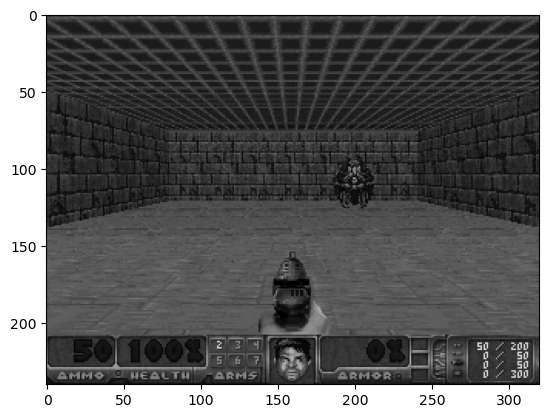

In [113]:
from matplotlib import pyplot as plt
plt.imshow(cv2.cvtColor(state, cv2.COLOR_BGR2RGB))